In [62]:
#Import things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import scipy.stats as st
from scipy.stats import linregress

table2 = pd.DataFrame(pd.read_csv("ghg_emissions_cleaned.csv"))
honeydf = pd.DataFrame(pd.read_csv("cleanhoney.csv"))
table10 = pd.DataFrame(pd.read_csv("totalpollutionbysector.csv"))
table2clean=table2.dropna(axis=1)


In [115]:
totalhoney = pd.DataFrame(pd.read_csv('honey bees.csv'))
totalhoney["numcol"].astype(str).astype(float) 
honeybystate = pd.DataFrame(totalhoney.groupby('state').mean()).reset_index()
honeybystate

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,10318.181818,61.318182,6.676818e+05,1.176818e+05,2.015909,1.028227e+06,2008.500000
1,AR,32727.272727,70.772727,2.407182e+06,7.180000e+05,1.346364,2.766000e+06,2008.500000
2,AZ,31000.000000,54.318182,1.723091e+06,6.624091e+05,1.443182,2.144773e+06,2008.500000
3,CA,379090.909091,50.227273,1.972114e+07,5.192591e+06,1.405455,2.433186e+07,2008.500000
4,CO,28636.363636,56.818182,1.614273e+06,6.591364e+05,1.511818,2.317682e+06,2008.500000
5,FL,202409.090909,73.090909,1.483514e+07,1.759682e+06,1.468182,1.935877e+07,2008.500000
6,GA,68636.363636,50.454545,3.352045e+06,3.710455e+05,1.623182,5.442364e+06,2008.500000
7,HI,10636.363636,98.863636,1.043636e+06,1.382273e+05,1.760909,1.840409e+06,2008.500000
8,IA,33181.818182,60.772727,2.006136e+06,1.092955e+06,1.630000,3.109455e+06,2008.500000
9,ID,97409.090909,40.863636,4.021000e+06,1.578955e+06,1.376818,5.155818e+06,2008.500000


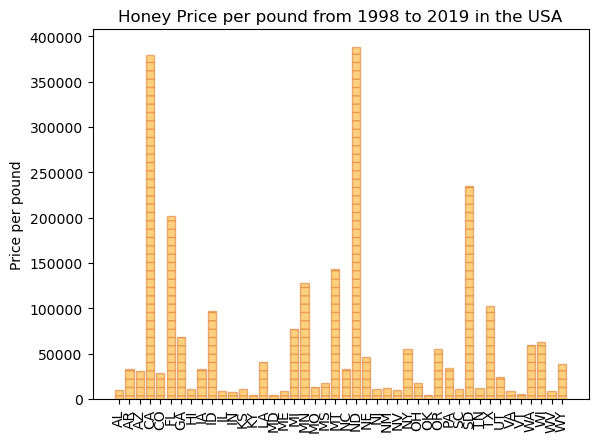

In [118]:
plt.bar(honeybystate ["state"],honeybystate ["numcol"], alpha=0.5, edgecolor='chocolate',color="orange", hatch='--')

plt.ylabel("Price per pound")
plt.xticks(honeybystate ["state"],rotation='vertical')
plt.title("Honey Price per pound from 1998 to 2019 in the USA")


plt.savefig("states.png", bbox_inches = "tight", transparent=True)
plt.show()


In [2]:
table2andhoney= pd.merge(honeydf,table2clean, on="year", how='outer').dropna(axis=0)
Table2andhoney =table2andhoney.replace(',','', regex=True)
Table2andhoney.astype(str).astype(float)
Table2andhoney.to_csv("table2andhoney.csv")
Table2andhoney

,year,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value,CO2,Fossil Fuel Combustion,Transportation,...,Stationary Combustion.1,Manure Management.1,Mobile Combustion.1,Nitric Acid Production,Adipic Acid Production,N2O from Product Uses,Composting.1,"Caprolactam, Glyoxal, and Glyoxylic Acid Production",Incineration of Waste.2,International Bunker Fuels b.2
0,1998,2621000.0,3008.0,219519000.0,80565000.0,35.80,146091000.0,5731050,5320581,1679024,...,95,52,194,48,17,16,4,7,1,3
1,1999,2637000.0,2815.0,202387000.0,78390000.0,34.58,123657000.0,5804669,5371982,1746445,...,95,54,186,46,16,16,4,7,1,3
2,2000,2604000.0,2906.0,219558000.0,84956000.0,34.03,131568000.0,6010508,5608609,1792301,...,100,55,182,45,18,16,4,7,1,3
3,2001,2542000.0,2840.0,185748000.0,64764000.0,40.12,132282000.0,5904882,5530665,1762572,...,99,54,175,36,15,16,5,6,1,3
4,2002,2565000.0,2939.0,171265000.0,39177000.0,60.34,227302000.0,5946771,5567973,1803118,...,103,56,168,39,17,14,5,7,1,3
5,2003,2591000.0,2752.0,181372000.0,40619000.0,65.77,252079000.0,6011837,5644298,1812082,...,107,56,161,37,18,14,5,7,1,3
6,2004,2539000.0,2657.0,182729000.0,60981000.0,52.67,197307000.0,6114007,5721277,1845324,...,111,54,154,37,12,14,6,7,1,3
7,2005,2394000.0,2635.0,173969000.0,62187000.0,49.00,160793000.0,6134521,5753507,1858648,...,115,55,139,38,24,14,6,7,1,3
8,2006,2378000.0,2536.0,154238000.0,60235000.0,53.45,157924000.0,6051668,5667213,1859216,...,114,57,137,37,29,14,6,7,1,3
9,2007,2428000.0,2426.0,147621000.0,52405000.0,58.97,161356000.0,6131004,5754027,1860822,...,116,58,122,44,34,14,6,7,1,3


In [3]:
table10clean= table10.rename(columns = {'Unnamed: 0':'year'})
table10clean.astype(str).astype(float)

,year,Transportation,Electric Power Industry,Industry,Agriculture,Commercial,Residential
0,1990.0,1526.6,1875.7,1640.7,600.2,429.2,345.1
1,1991.0,1480.5,1871.7,1613.6,590.8,436.5,354.7
2,1992.0,1540.0,1886.7,1649.1,591.7,432.1,361.2
3,1993.0,1577.0,1962.5,1620.2,619.8,425.6,372.6
4,1994.0,1632.0,1987.3,1645.6,607.0,428.9,363.3
5,1995.0,1667.1,2004.0,1662.5,619.2,428.0,367.5
6,1996.0,1723.4,2077.1,1691.9,626.2,435.7,399.5
7,1997.0,1750.0,2143.2,1691.3,614.7,428.2,380.8
8,1998.0,1792.4,2229.7,1661.8,621.8,403.0,346.9
9,1999.0,1863.4,2243.8,1609.3,612.7,399.4,366.7


In [4]:
table10andhoney= pd.merge(honeydf,table10clean, on="year", how='outer').dropna(axis=0)
table10andhoney.to_csv("table10andhoney.csv")
table10andhoney

,year,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value,Transportation,Electric Power Industry,Industry,Agriculture,Commercial,Residential
0,1998,2621000.0,3008.0,219519000.0,80565000.0,35.80,146091000.0,1792.4,2229.7,1661.8,621.8,403.0,346.9
1,1999,2637000.0,2815.0,202387000.0,78390000.0,34.58,123657000.0,1863.4,2243.8,1609.3,612.7,399.4,366.7
2,2000,2604000.0,2906.0,219558000.0,84956000.0,34.03,131568000.0,1913.7,2349.5,1598.8,598.1,413.7,388.0
3,2001,2542000.0,2840.0,185748000.0,64764000.0,40.12,132282000.0,1885.6,2310.0,1549.2,618.9,402.7,378.1
4,2002,2565000.0,2939.0,171265000.0,39177000.0,60.34,227302000.0,1926.1,2325.9,1532.1,621.9,404.3,375.3
5,2003,2591000.0,2752.0,181372000.0,40619000.0,65.77,252079000.0,1933.4,2357.2,1510.8,622.4,420.6,393.7
6,2004,2539000.0,2657.0,182729000.0,60981000.0,52.67,197307000.0,1966.0,2390.2,1559.5,635.0,418.5,381.9
7,2005,2394000.0,2635.0,173969000.0,62187000.0,49.00,160793000.0,1975.6,2456.3,1518.8,629.7,407.9,371.0
8,2006,2378000.0,2536.0,154238000.0,60235000.0,53.45,157924000.0,1975.9,2399.6,1550.2,628.9,394.5,334.3
9,2007,2428000.0,2426.0,147621000.0,52405000.0,58.97,161356000.0,1974.4,2466.3,1541.2,646.1,408.5,355.3


GRAPHS

the idea behind the following graphs is to discover a relationship between Greenhouse gasses and the colonies of bees in the USA, first we would analize the number of colonies through the years, secondly we would compare them with the Greenhouse gasses by different sectors and finally we will see the behavior of honey prices if there is time we will map the biggest indutry pollutants and the states where honey is mostly produced 

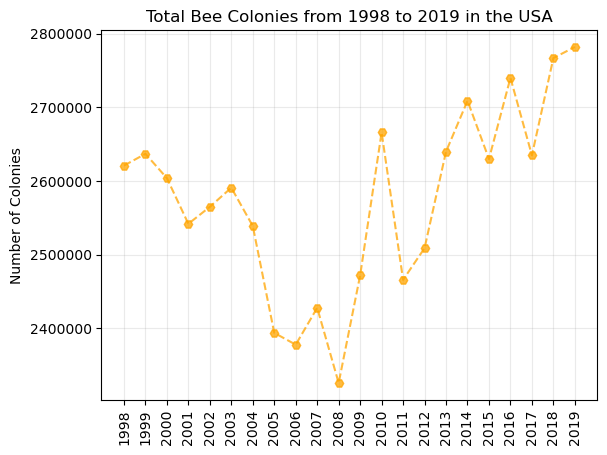

In [54]:
plt.plot(table10andhoney["year"],table10andhoney["Number of Colonies"], '--',marker='H',alpha=0.75,color="orange")

plt.ylabel("Number of Colonies")
plt.title("Total Bee Colonies from 1998 to 2019 in the USA")
plt.xticks(table10andhoney["year"],rotation='vertical')
plt.grid(color='#999999', linestyle='-', alpha=0.2)
plt.ticklabel_format(useOffset=False, style='plain')
plt.style.use('default')
plt.savefig("totalbeecolonies.png", bbox_inches = "tight", transparent=True)
plt.show()


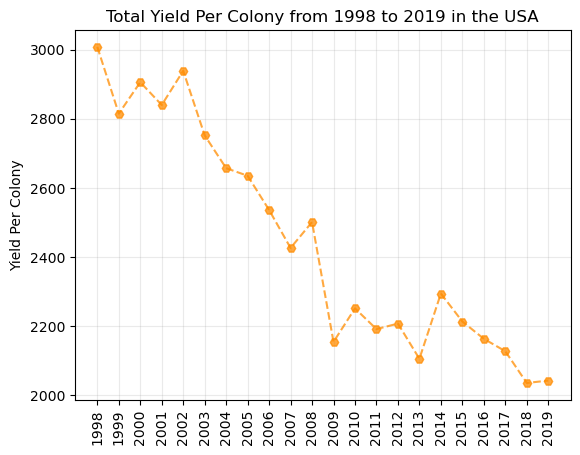

In [114]:
plt.plot(table10andhoney["year"],table10andhoney["Yield Per Colony"], '--',marker='H',alpha=0.75,color="darkorange")

plt.ylabel("Yield Per Colony")
plt.title("Total Yield Per Colony from 1998 to 2019 in the USA")
plt.xticks(table10andhoney["year"],rotation='vertical')
plt.grid(color='#999999', linestyle='-', alpha=0.2)
plt.ticklabel_format(useOffset=False, style='plain')
plt.style.use('default')
plt.savefig("YieldPerColony.png", bbox_inches = "tight", transparent=True)
plt.show()


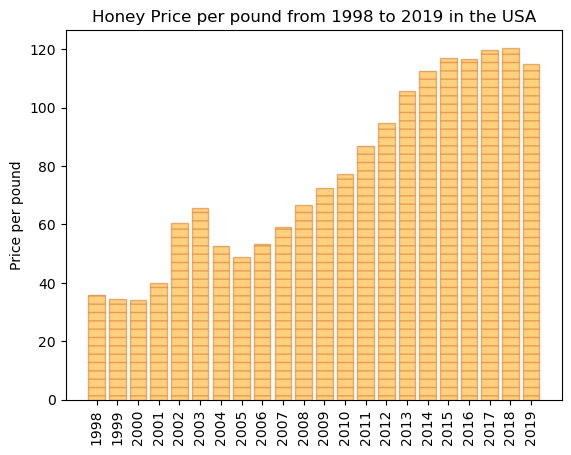

In [57]:
plt.bar(table10andhoney["year"],table10andhoney["Price Per Pound"], alpha=0.5, edgecolor='chocolate',color="orange", hatch='--')

plt.ylabel("Price per pound")
plt.xticks(table10andhoney["year"],rotation='vertical')
plt.title("Honey Price per pound from 1998 to 2019 in the USA")
plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig("honeyproductionvalue.png", bbox_inches = "tight", transparent=True)
plt.show()


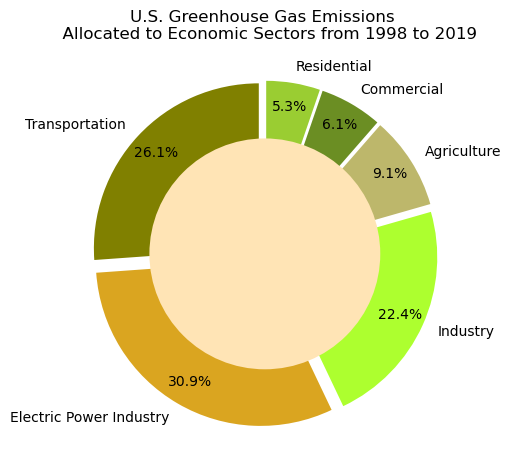

In [52]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
colors = ['olive','goldenrod','greenyellow','darkkhaki','olivedrab','yellowgreen']
table10clean[table10clean.columns[1:]].sum().plot.pie( autopct="%1.1f%%", ylabel='', startangle=90, pctdistance=0.85, colors= colors, explode = explode)
plt.title('U.S. Greenhouse Gas Emissions \n  Allocated to Economic Sectors from 1998 to 2019')
centre_circle = plt.Circle((0,0),0.70,fc='moccasin')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.savefig("gaseconopmicsectors.png", transparent=True)
plt.show()

The r-squared is: -0.5851235728869383


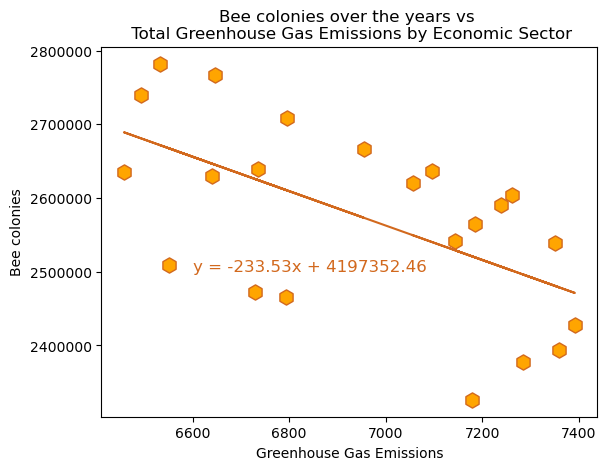

In [58]:
col_list= ['Transportation', 'Electric Power Industry', 'Industry','Agriculture','Commercial','Residential']
# sum specific columns
table10andhoney['Sum'] = table10andhoney[col_list].sum(axis=1)
table10andhoney['Sum']
# Calculate the correlation coefficient and linear regression model for total gases and bee colonies
correlation = st.pearsonr(table10andhoney['Sum'],table10andhoney['Number of Colonies'])
x = table10andhoney['Sum']
y = table10andhoney['Number of Colonies']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x,y, marker='h',
    facecolors='orange',
    edgecolors='chocolate',s=120)
plt.plot(x,regress_values, color='chocolate')
plt.annotate(line_eq,(6600,2500000),fontsize=12,color="chocolate")
plt.title("Bee colonies over the years vs \n Total Greenhouse Gas Emissions by Economic Sector")
plt.xlabel("Greenhouse Gas Emissions")
plt.ylabel("Bee colonies")
plt.ticklabel_format(useOffset=False, style='plain')
print(f"The r-squared is: {rvalue}")

plt.savefig("coloniesvsgasscatterplot.png")
plt.show()

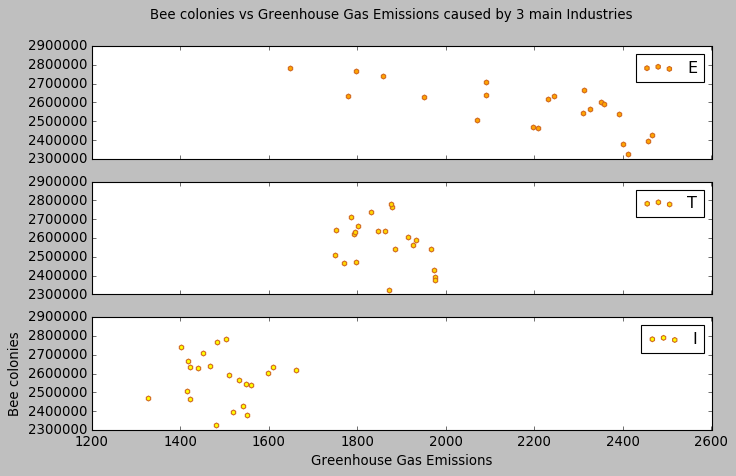

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 6),sharex=True, sharey=True)
fig.suptitle('Bee colonies vs Greenhouse Gas Emissions caused by 3 main Industries')
ax1.scatter(x = table10andhoney['Electric Power Industry'], y =table10andhoney['Number of Colonies'],marker='h',
    facecolors='orange',
    edgecolors='chocolate')
ax1.legend('Electric Power Industry') 
    
ax2.scatter(x = table10andhoney['Transportation'], y =table10andhoney['Number of Colonies'],marker='h',
    facecolors='gold',
    edgecolors='chocolate')
ax2.legend('Transportation') 
ax3.scatter(x = table10andhoney['Industry'], y =table10andhoney['Number of Colonies'],marker='h',
    facecolors='yellow',
    edgecolors='chocolate')
ax3.legend('Industry') 
plt.xlabel("Greenhouse Gas Emissions")
plt.ylabel("Bee colonies")
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("coloniesvsgasscatterplot3mainsectors.png", bbox_inches = "tight")

plt.show()
